**1. IMPORT LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

**2. IMPORT DATASET**

In [ ]:
data = pd.read_csv("tested.csv")
print("Missing values before handling:")
print(data.isnull().sum())

Missing values before handling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


**3. PREPARING DATA FOR MODELING**

In [ ]:
data.dropna(inplace=True)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

In [ ]:
linear_accuracy = accuracy_score(y_test, [round(pred) for pred in linear_predictions])
logistic_accuracy = accuracy_score(y_test, logistic_predictions)

print("Linear Regression Accuracy:", linear_accuracy)
print("Logistic Regression Accuracy:", logistic_accuracy)

Linear Regression Accuracy: 1.0
Logistic Regression Accuracy: 1.0


**4. EXPLORATORY DATA ANALYSIS (EDA)**

In [ ]:
data.dropna(inplace=True)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = data[numeric_cols].corr()

In [ ]:
descriptive_stats = data.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
       PassengerId   Survived     Pclass  Sex        Age      SibSp  \
count    87.000000  87.000000  87.000000  0.0  87.000000  87.000000   
mean   1102.712644   0.505747   1.137931  NaN  39.247126   0.597701   
std     126.751901   0.502865   0.435954  NaN  15.218730   0.637214   
min     904.000000   0.000000   1.000000  NaN   1.000000   0.000000   
25%     986.000000   0.000000   1.000000  NaN  27.000000   0.000000   
50%    1094.000000   1.000000   1.000000  NaN  39.000000   1.000000   
75%    1216.000000   1.000000   1.000000  NaN  50.000000   1.000000   
max    1306.000000   1.000000   3.000000  NaN  76.000000   3.000000   

           Parch        Fare  
count  87.000000   87.000000  
mean    0.482759   98.109198  
std     0.860801   88.177319  
min     0.000000    0.000000  
25%     0.000000   35.339600  
50%     0.000000   71.283300  
75%     1.000000  135.066650  
max     4.000000  512.329200  


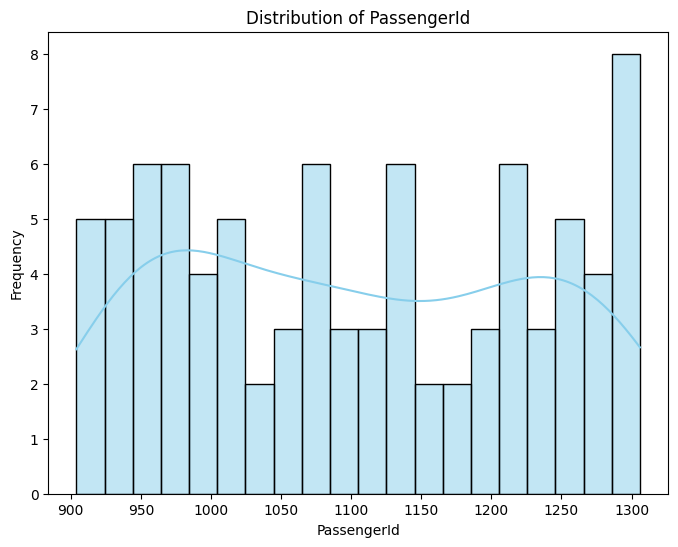

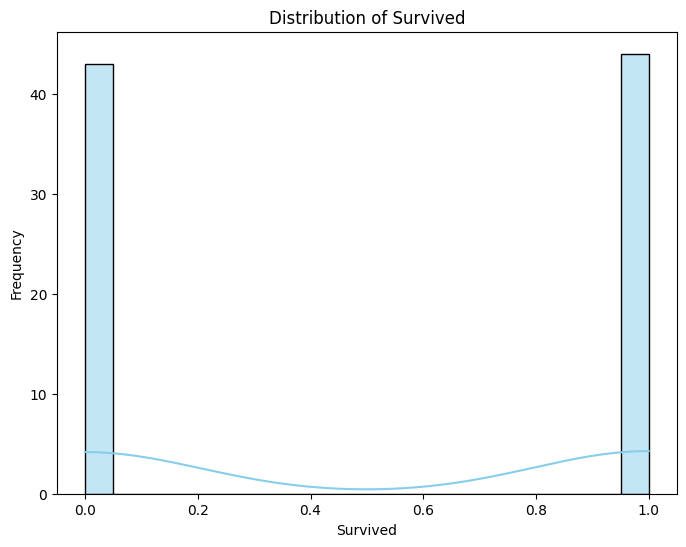

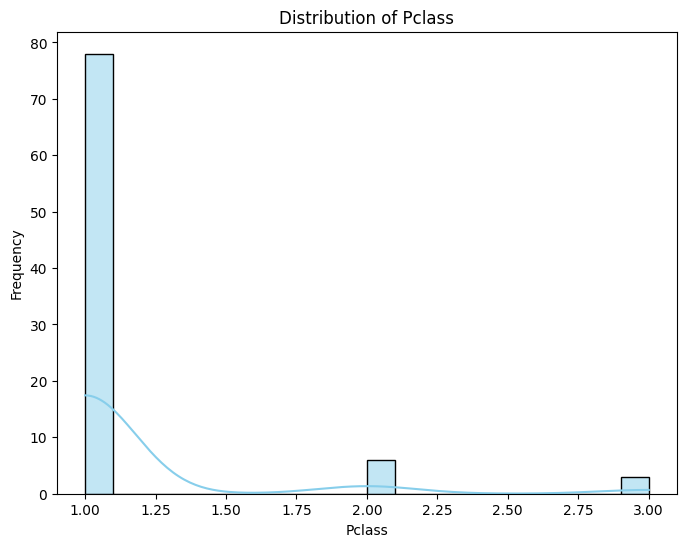

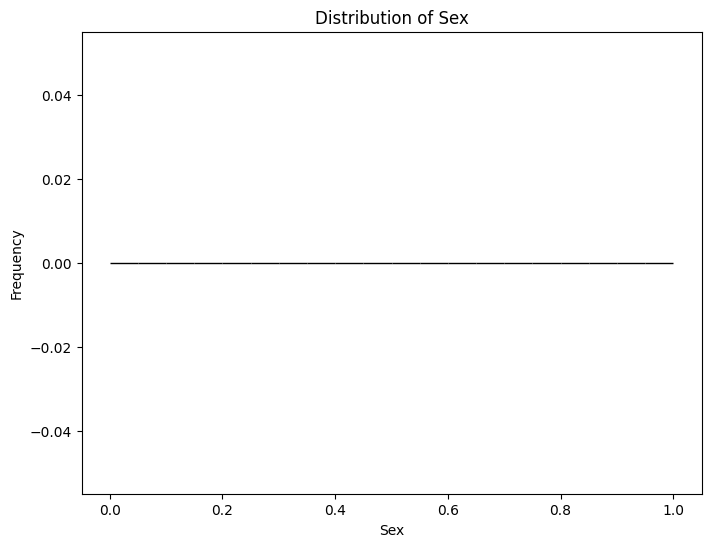

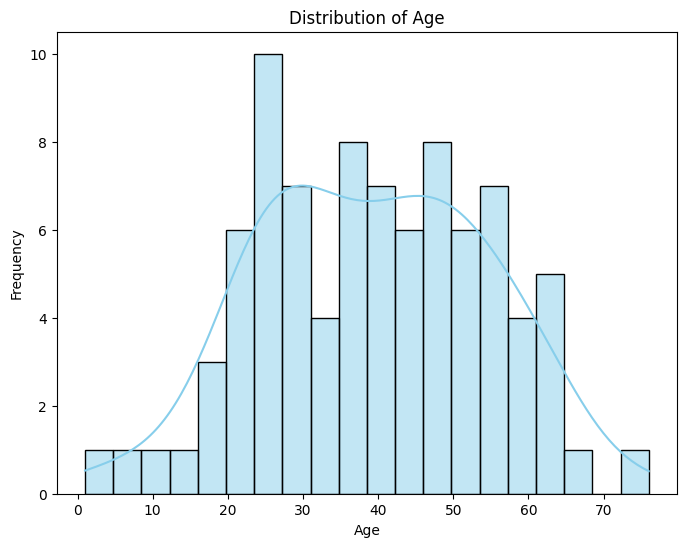

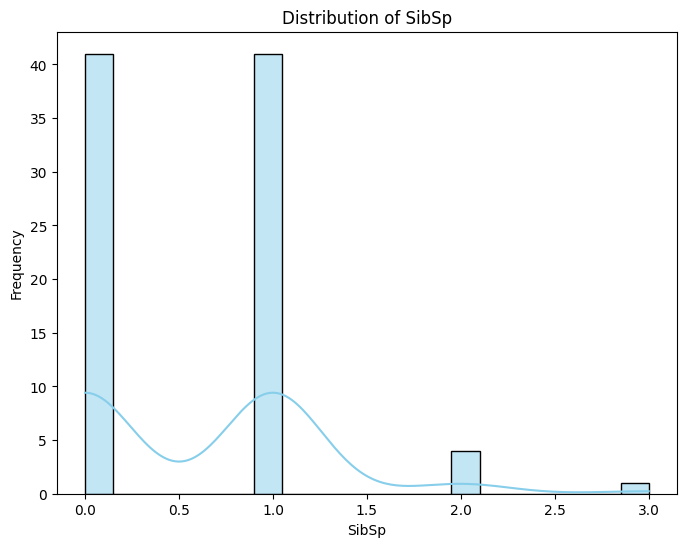

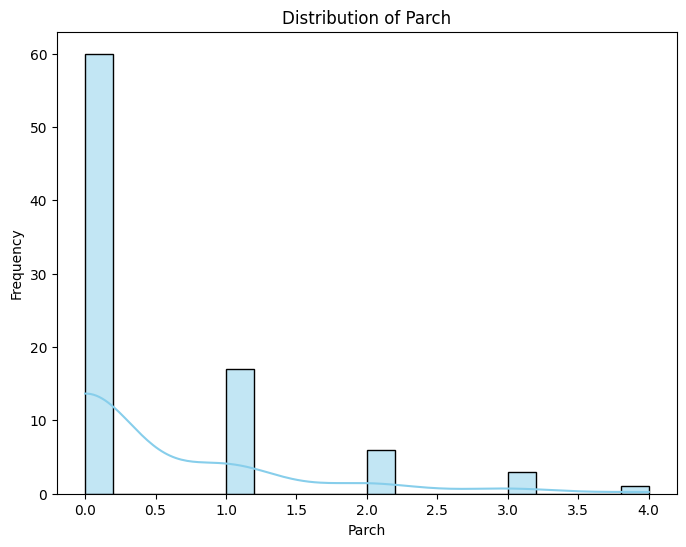

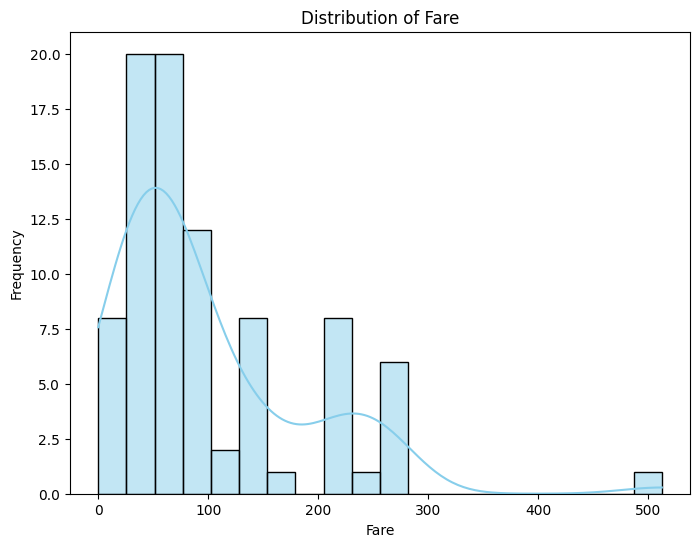

In [ ]:
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<Figure size 1000x800 with 0 Axes>

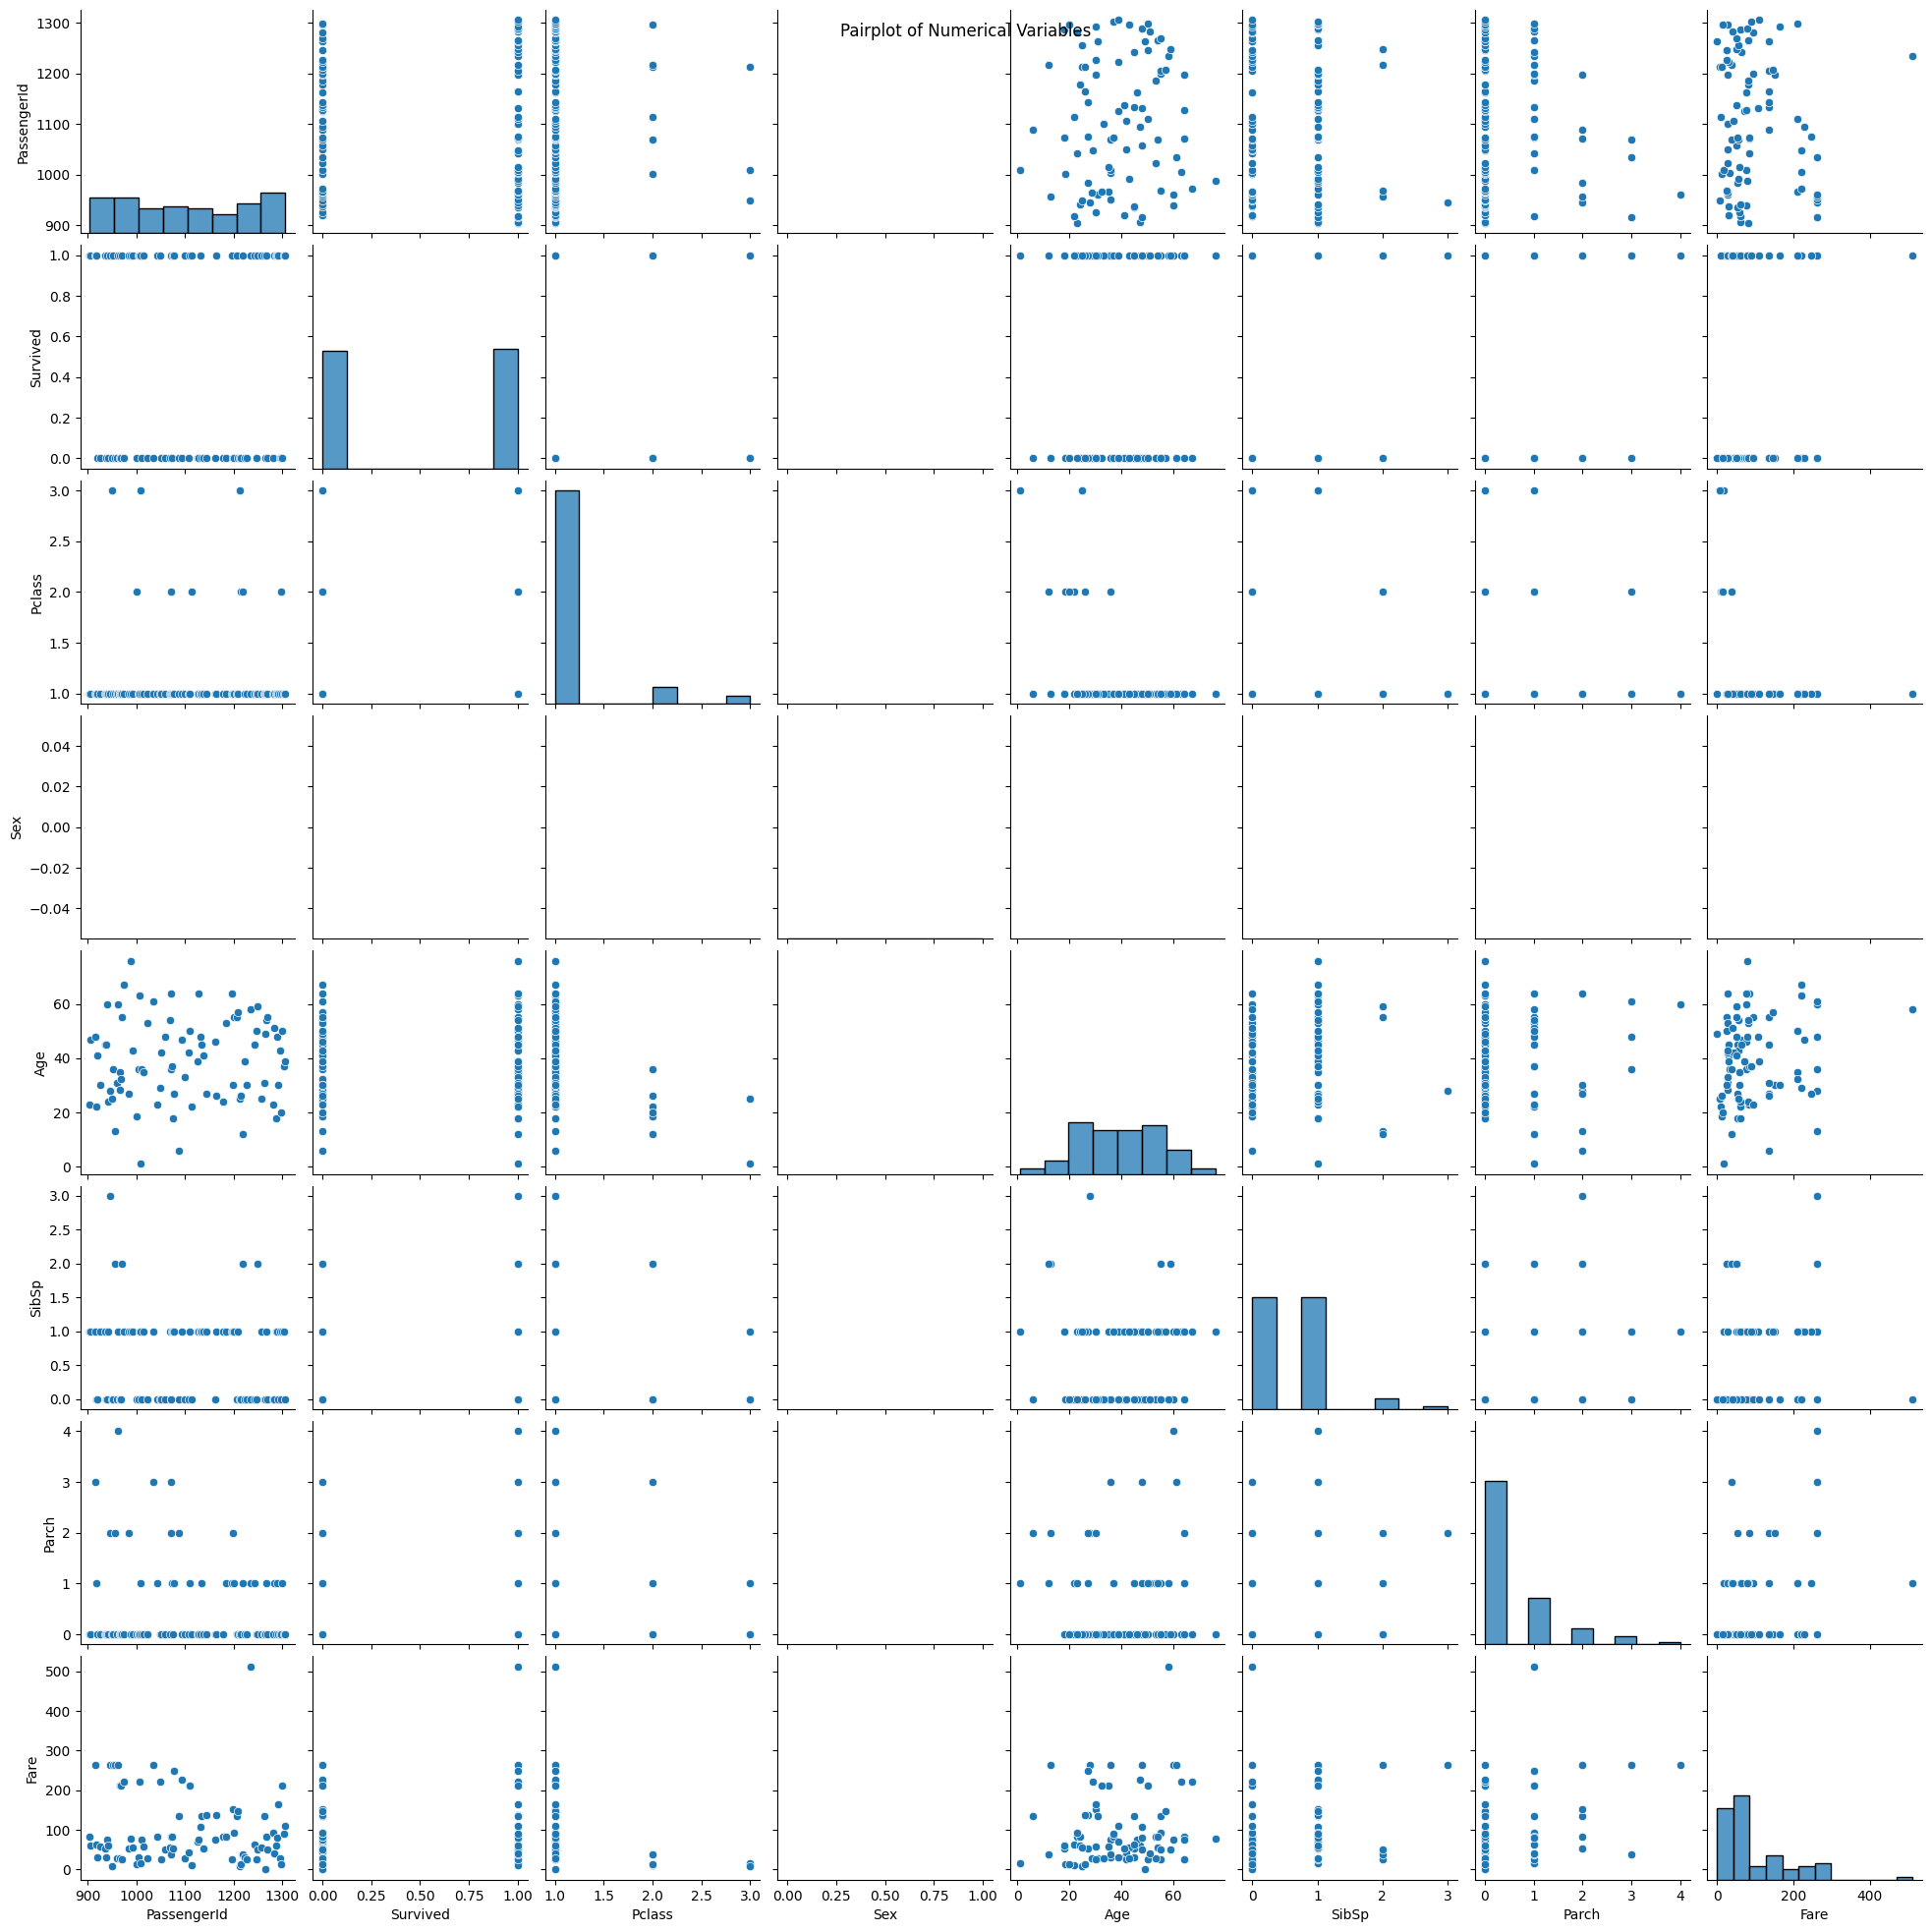

In [ ]:
plt.figure(figsize=(10, 8))
sns.pairplot(data[numeric_cols])
plt.suptitle('Pairplot of Numerical Variables')
plt.show()

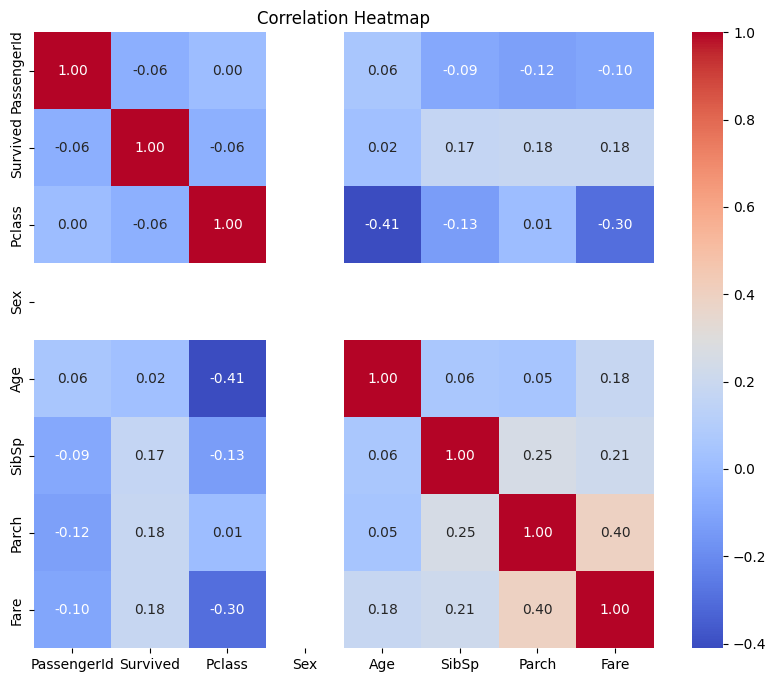

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**5. LINEAR REGRESSION MODEL**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

data = pd.read_csv("tested.csv")

print("Missing values before handling:")
print(data.isnull().sum())

X = data[['PassengerId']]
y = data['Survived']

Missing values before handling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

y_pred = model.predict(X_test)

print("R-squared:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

Intercept: 0.42963074917332106
Coefficients: [-6.93779394e-05]
R-squared: -0.009646395929914009
Mean Squared Error: 0.2432538085432049
Root Mean Squared Error: 0.493207672834887


**6. LOGISTIC REGRESSION MODEL**

Missing values before handling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
Coefficients: [[-0.0005473]]
Intercept: [-5.13905881e-07]
Accuracy: 0.5952380952380952
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


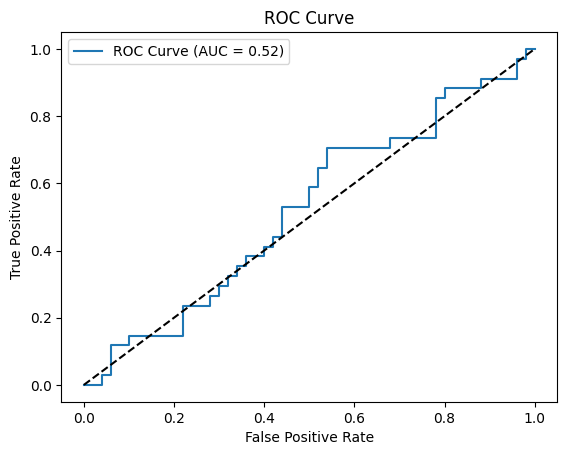

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

data = pd.read_csv("tested.csv")

print("Missing values before handling:")
print(data.isnull().sum())

X = data[['PassengerId']]
y = data['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**CONCLUSION AND INSIGHT ABOUT THE DATA RESULT**


The case study illustrated how statistical and machine learning techniques can enhance data-driven decision-making. By utilizing methods like Linear and Logistic Regression, the study extracted valuable insights from data, aiding in making well-informed decisions. These techniques helped identify important variables and forecast outcomes, leading to a better grasp of underlying patterns in the dataset. Moreover, the models' interpretability facilitated clear communication of findings to stakeholders. Looking forward, these models have broad applications across various fields like finance, healthcare, and marketing, where predictive analytics is pivotal. It's crucial to acknowledge the assumptions and constraints of these models to ensure that the drawn conclusions are reliable and actionable. In summary, a thorough grasp of statistical and machine learning methods empowers organizations to effectively utilize data for strategic decision-making and problem-solving.